In [1]:
#=
N=1
t=10
d=10
Y1=Matrix{Float64}(undef,t,N)
randx=zeros(Float64,N)
for j=1:t
    randx=rand(Float64,N).-0.25
    Y1[j,:]=randx
end

Y2=Matrix{Float64}(undef,t,N)
for j=1:t
    randx=-rand(Float64,N).+0.25
    Y2[j,:]=randx
end
=#

In [2]:
#=
data="/home/hoanganh/Desktop/math-topics/algebraic_statistics/codes/datasets/plot" # path of data
output_file = open(data*"/univariate_MLE_data.jl","w")

write(output_file, "d = $(d)")
write(output_file, "; \n \n")
write(output_file, "N = $(N)")
write(output_file, "; \n \n")
write(output_file, "t = $(t)")
write(output_file, "; \n \n")
write(output_file, "Y1 = ")
show(output_file, Y1)
write(output_file, "; \n \n")
write(output_file, "Y2 = ")
show(output_file, Y2)
write(output_file, "; \n \n")

close(output_file)
=#

In [3]:
data="/home/hoanganh/Desktop/math-topics/algebraic_statistics/codes/datasets/plot" # path of data
include(data*"/univariate_MLE_data.jl");

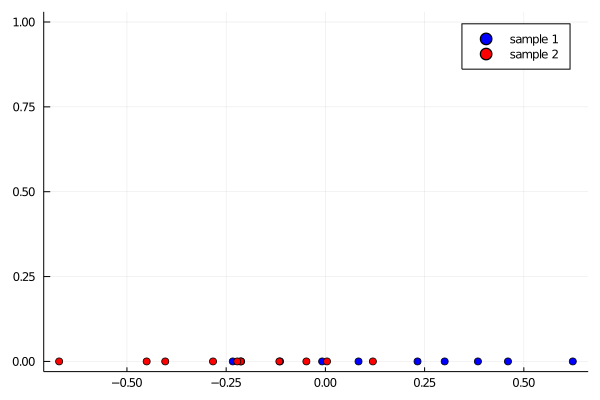

In [4]:
using Plots

#p_exact(z)=0.5
scatter(Y1[:,1], zeros(Float64,t),label ="sample 1",color="Blue")
scatter!(Y2[:,1], zeros(Float64,t),label ="sample 2",color="Red")
#plot!(p_exact, -r, r, label ="exact 1")

In [5]:
include("../src/ClassificationModels.jl")
using .ClassificationModels


R=1

x1=ClassificationModels.solve_opt(N,Y1,t,R,d,delta=1,s=1,rho=1,numiter=1e4,eps=1e-4,tol_eig=1e-3,ball_cons=true);

iter=9951  val=0.1146  norm_vF=0.0032  norm_Axb=0.0121  norm_T=4.7064
iter=9952  val=0.1261  norm_vF=0.0051  norm_Axb=0.0148  norm_T=4.0381
iter=9953  val=0.1144  norm_vF=0.0019  norm_Axb=0.0126  norm_T=4.7456
iter=9954  val=0.1266  norm_vF=0.0052  norm_Axb=0.0145  norm_T=4.1344
iter=9955  val=0.1145  norm_vF=0.0014  norm_Axb=0.0138  norm_T=5.6239
iter=9956  val=0.1245  norm_vF=0.0047  norm_Axb=0.0129  norm_T=3.6347
iter=9957  val=0.1159  norm_vF=0.0020  norm_Axb=0.0113  norm_T=4.1362
iter=9958  val=0.1266  norm_vF=0.0055  norm_Axb=0.0151  norm_T=4.1145
iter=9959  val=0.1142  norm_vF=0.0015  norm_Axb=0.0127  norm_T=4.7648
iter=9960  val=0.1260  norm_vF=0.0058  norm_Axb=0.0143  norm_T=4.0884
iter=9961  val=0.1142  norm_vF=0.0004  norm_Axb=0.0140  norm_T=4.7745
iter=9962  val=0.1265  norm_vF=0.0056  norm_Axb=0.0132  norm_T=4.1030
iter=9963  val=0.1142  norm_vF=0.0000  norm_Axb=0.0153  norm_T=5.3103
iter=9964  val=0.1257  norm_vF=0.0049  norm_Axb=0.0160  norm_T=3.8416
iter=9965  val=0.115

In [6]:
include("../src/ClassificationModels.jl")
using .ClassificationModels

eval_PDF1=ClassificationModels.func_eval_PDF(x1,N,d,R,ball_cons=true)

(::Main.ClassificationModels.var"#eval_PDF#17"{Array{Float64,1},Int64,Int64,Array{UInt64,1},Array{Array{Float64,1},1},Array{SparseArrays.SparseMatrixCSC{UInt64,Ti} where Ti<:Integer,1},Int64,Array{Int64,1},SparseArrays.SparseMatrixCSC{UInt64,Int64}}) (generic function with 1 method)

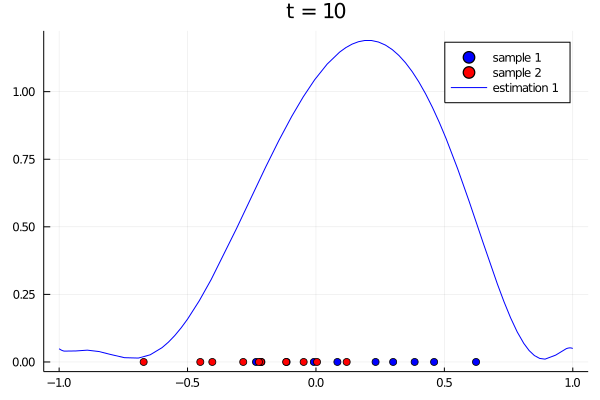

In [7]:
r=1

p_approx1(z)=eval_PDF1([z;zeros(N-1)])
plot!(p_approx1, -r, r, label = "estimation 1",#=legend=:bottomright,=#title = "t = $(t)",color="Blue")

In [8]:
include("../src/ClassificationModels.jl")
using .ClassificationModels

x2=ClassificationModels.solve_opt(N,Y2,t,R,d,delta=1,s=1,rho=1,numiter=1e4,eps=1e-4,tol_eig=1e-3,ball_cons=true);

iter=9951  val=-0.0187  norm_vF=0.0011  norm_Axb=0.0178  norm_T=5.1012
iter=9952  val=-0.0081  norm_vF=0.0042  norm_Axb=0.0098  norm_T=3.4419
iter=9953  val=-0.0175  norm_vF=0.0012  norm_Axb=0.0174  norm_T=5.3413
iter=9954  val=-0.0080  norm_vF=0.0036  norm_Axb=0.0098  norm_T=3.8370
iter=9955  val=-0.0180  norm_vF=0.0020  norm_Axb=0.0168  norm_T=5.1250
iter=9956  val=-0.0078  norm_vF=0.0037  norm_Axb=0.0106  norm_T=3.8706
iter=9957  val=-0.0182  norm_vF=0.0021  norm_Axb=0.0167  norm_T=5.0156
iter=9958  val=-0.0081  norm_vF=0.0044  norm_Axb=0.0106  norm_T=3.9082
iter=9959  val=-0.0187  norm_vF=0.0012  norm_Axb=0.0174  norm_T=4.9881
iter=9960  val=-0.0078  norm_vF=0.0042  norm_Axb=0.0103  norm_T=3.8530
iter=9961  val=-0.0183  norm_vF=0.0003  norm_Axb=0.0182  norm_T=5.0382
iter=9962  val=-0.0079  norm_vF=0.0040  norm_Axb=0.0092  norm_T=3.8001
iter=9963  val=-0.0183  norm_vF=0.0015  norm_Axb=0.0185  norm_T=5.5543
iter=9964  val=-0.0085  norm_vF=0.0037  norm_Axb=0.0089  norm_T=3.7310
iter=9

In [9]:
include("../src/ClassificationModels.jl")
using .ClassificationModels

eval_PDF2=ClassificationModels.func_eval_PDF(x2,N,d,R,ball_cons=true)

(::Main.ClassificationModels.var"#eval_PDF#17"{Array{Float64,1},Int64,Int64,Array{UInt64,1},Array{Array{Float64,1},1},Array{SparseArrays.SparseMatrixCSC{UInt64,Ti} where Ti<:Integer,1},Int64,Array{Int64,1},SparseArrays.SparseMatrixCSC{UInt64,Int64}}) (generic function with 1 method)

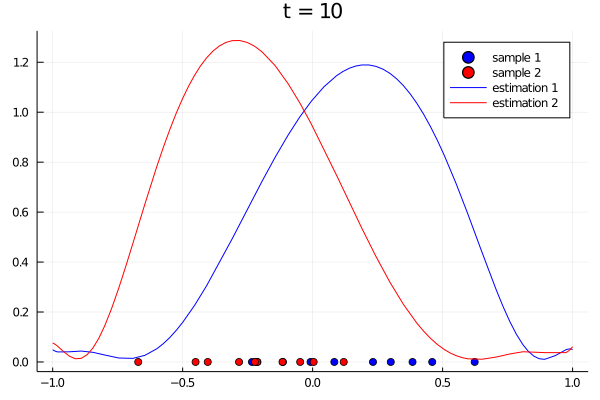

In [10]:
#r=1

p_approx2(z)=eval_PDF2([z;zeros(N-1)])
plot!(p_approx2, -r, r, label = "estimation 2",#=legend=:bottomright,=#title = "t = $(t)",color="Red")

In [11]:
savefig(data*"/univariate_classification_numsamp$(t).png")